# Basic Setup

In [1]:
# Import library

## wrangling
import pandas as pd
import numpy as np

## visualization
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

## warning
import warnings
warnings.filterwarnings("ignore")

## sql
import sqlite3

In [2]:
# Buat path file
dbfile = "olist.db"

# Buat koneksi SQL ke database SQLite
con = sqlite3.connect(dbfile)

# Buat kursor
cur = con.cursor()

# Baca nama semua tabel
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

# Tampilkan nama semua tabel
print(table_list)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


# Read All Tables

### 1. Order (olist_order_dataset)

In [3]:
# Akses tabel olist_order dari database
order = pd.read_sql_query("SELECT * FROM olist_order_dataset", con)

# Hapus kolom "index"
order.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel order
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### 2. Order Reviews (olist_order_reviews_dataset)

In [4]:
# Akses tabel olist_order_reviews dari database
order_reviews = pd.read_sql_query("SELECT * FROM olist_order_reviews_dataset", con)

# Hapus kolom "index"
order_reviews.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel order_reviews
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### 3. Order Payment (olist_order_payments_dataset)

In [5]:
# Akses tabel olist_order_payments dari database
order_payments = pd.read_sql_query("SELECT * FROM olist_order_payments_dataset", con)

# Hapus kolom "index"
order_payments.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel order_payments
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### 4. Order Items (olist_order_items_dataset)

In [6]:
# Akses tabel olist_order_items dari database
order_items = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", con)

# Hapus kolom "index"
order_items.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel order_items
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### 5. Product (olist_products_dataset)

In [7]:
# Akses tabel olist_products dari database
products = pd.read_sql_query("SELECT * FROM olist_products_dataset", con)

# Hapus kolom "index"
products.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel products
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### 6. Product_translation (product_category_name_translation)

In [8]:
# Akses tabel product_category_name_translation dari database
product_translation = pd.read_sql_query("SELECT * FROM product_category_name_translation", con)

# Hapus kolom "index"
product_translation.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel product_translation
product_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 7. Customer (olist_order_customer_dataset)

In [9]:
# Akses tabel olist_order_customer dari database
customer = pd.read_sql_query("SELECT * FROM olist_order_customer_dataset", con)

# Hapus kolom "index"
customer.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel customer
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### 8. Geolocation (olist_geolocation_dataset)

In [10]:
# Akses tabel olist_geolocation dari database
geolocation = pd.read_sql_query("SELECT * FROM olist_geolocation_dataset", con)

# Hapus kolom "index"
geolocation.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel geolocation
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### 9. Seller (olist_sellers_dataset)

In [11]:
# Akses tabel olist_sellers dari database
sellers = pd.read_sql_query("SELECT * FROM olist_sellers_dataset", con)

# Hapus kolom "index"
sellers.drop(["index"], axis=1, inplace=True)

# Tampilkan tabel seller
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Exploratory Data Analysis (EDA)

## Objektif:

1. Bagaimana popularitas kategori produk yang dipesan?
2. Bagaimana potensi kehilangan pendapatan (revenue loss) dari produk yang dipesan?
3. Bagaimana trend pendapatan (revenue) tiap kategori produk selama satu tahun terakhir?
4. Bagaimana trend jumlah produk yang berhasil dikirim ke customer selama setahun terakhir?
5. Bagaimana trend jumlah keberhasilan penyelesaian order selama setahun terakhir?

## Objektif #1: Bagaimana popularitas kategori produk yang dipesan?

### Data Preparation

In [12]:
# Gabungkan tabel order_items, products, dan product_translation
order_items_products = pd.merge(order_items, products, on="product_id", how="left")
order_items_products = pd.merge(order_items_products, product_translation, on="product_category_name", how="left")

# Filter kolom yang akan dianalisis
ordered_products = order_items_products.loc[:,["order_id",
                                           "product_category_name", 
                                           "product_category_name_english"]]
# Tampilkan tabel gabungan
ordered_products

,order_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas_jardim,garden_tools
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,utilidades_domesticas,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,informatica_acessorios,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,esporte_lazer,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,informatica_acessorios,computers_accessories


### Finding & Handling Missing Value

In [13]:
# Cek dan hitung banyaknya missing value tiap kolom
ordered_products.isnull().sum()

order_id                            0
product_category_name            1603
product_category_name_english    1627
dtype: int64

In [14]:
# Cek selisih total missing values antara dua kolom nama kategori produk
# Adanya selisih berarti terdapat kategori produk yang memiliki nama Portugis namun tidak ada nama Inggris
ordered_products[["product_category_name", "product_category_name_english"]].loc[
    (ordered_products["product_category_name"].notna()) & (ordered_products["product_category_name_english"].isna())]

,product_category_name,product_category_name_english
3228,portateis_cozinha_e_preparadores_de_alimentos,NaN
12976,pc_gamer,NaN
12977,pc_gamer,NaN
13025,portateis_cozinha_e_preparadores_de_alimentos,NaN
18629,pc_gamer,NaN
19702,portateis_cozinha_e_preparadores_de_alimentos,NaN
31806,pc_gamer,NaN
32887,pc_gamer,NaN
36976,portateis_cozinha_e_preparadores_de_alimentos,NaN
37083,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [15]:
# Isi missing values hasil pengecekan ketiadaan nama Inggris

## Buat dictionary pengisi missing value
translate = {"pc_gamer":"pc_gamer", 
             "portateis_cozinha_e_preparadores_de_alimentos":"kitchen_and_food_preparators_portables"}

## Isi missing values kategori produk yang memiliki nama Portugis namun tidak ada nama Inggris
ordered_products["product_category_name_english"] = ordered_products["product_category_name_english"]\
                                                    .fillna(ordered_products["product_category_name"].map(translate))

In [16]:
# Drop baris dengan missing value pada kedua kolom nama kategori produk
ordered_products = ordered_products.dropna(subset=['product_category_name', 'product_category_name_english'])

# Drop kolom product_category_name
ordered_products = ordered_products.drop("product_category_name", axis=1)

In [17]:
# Tampilkan data hasil handling missing values
ordered_products

,order_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,computers_accessories


In [18]:
# Cek dan hitung kembali banyaknya missing value tiap kolom
ordered_products.isnull().sum()

order_id                         0
product_category_name_english    0
dtype: int64

### Finding and Handling Duplicate

In [19]:
# Cek dan tampilkan data duplikat
ordered_products[ordered_products.duplicated(keep=False)]

,order_id,product_category_name_english
13,0008288aa423d2a3f00fcb17cd7d8719,garden_tools
14,0008288aa423d2a3f00fcb17cd7d8719,garden_tools
32,00143d0f86d6fbd9f9b38ab440ac16f5,sports_leisure
33,00143d0f86d6fbd9f9b38ab440ac16f5,sports_leisure
34,00143d0f86d6fbd9f9b38ab440ac16f5,sports_leisure
...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,computers_accessories
112640,fffb9224b6fc7c43ebb0904318b10b5f,watches_gifts
112641,fffb9224b6fc7c43ebb0904318b10b5f,watches_gifts
112642,fffb9224b6fc7c43ebb0904318b10b5f,watches_gifts


In [20]:
# Hapus data duplikat kecuali data pertama tiap duplikat
ordered_products.drop_duplicates(keep="first", inplace=True)

# Cek dan hitung banyaknya duplikat pada data
ordered_products.duplicated().sum()

0

In [21]:
# Tampilkan data hasil handling duplicate
ordered_products

,order_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,computers_accessories


### Finding and Handling Inconsistent Format

In [22]:
# Cek data unik pada kolom kategori produk
unique_data = ordered_products["product_category_name_english"].unique()

# Urutkan dan tampilkan data unik
print(sorted(unique_data))

['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food', 'food_drink', 'furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_appliances_2', 'home_comfort_2', 'home_confort', 'home_construction', 'housewares', 'indust

In [23]:
# Buat dictionary mapping inkonsisten untuk penyeragaman
map_inkonsisten = {"home_appliances_2":"home_appliances", 
                   "home_comfort_2":"home_comfort", 
                   "home_confort":"home_comfort"}

# Lakukan penyeragaman sesuai hasil mapping
ordered_products["product_category_name_english"]= ordered_products["product_category_name_english"]\
                                                .replace(map_inkonsisten)

# Tampilkan data unik hasil handling inconsistent format
unique_data_clean = ordered_products["product_category_name_english"].unique()

# Urutkan dan tampilkan data unik
print(sorted(unique_data_clean))

['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food', 'food_drink', 'furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_comfort', 'home_construction', 'housewares', 'industry_commerce_and_business', 'kitchen_and

In [24]:
# Ubah nama kolom 
ordered_products = ordered_products.rename({"order_id":"order_count",
                                            "product_category_name_english":"product_category"},
                                            axis=1)

# Hitung banyaknya order untuk tiap kategori produk
ordered_products_count = ordered_products[["product_category","order_count"]].groupby("product_category").count()

# Tampilkan data banyaknya order tiap kategori produk
ordered_products_count

,order_count
product_category,
agro_industry_and_commerce,182
air_conditioning,253
art,202
arts_and_craftmanship,23
audio,350
...,...
stationery,2311
tablets_printing_image,79
telephony,4199


### Visualization

In [25]:
# Urutkan hasil grouping dari yang terbanyak dipesan dan reset index
most_ordered = ordered_products_count.sort_values("order_count", ascending=False).reset_index()

# Tampilkan hasil
most_ordered

,product_category,order_count
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
...,...,...
66,la_cuisine,13
67,cds_dvds_musicals,12
68,pc_gamer,8
69,fashion_childrens_clothes,8


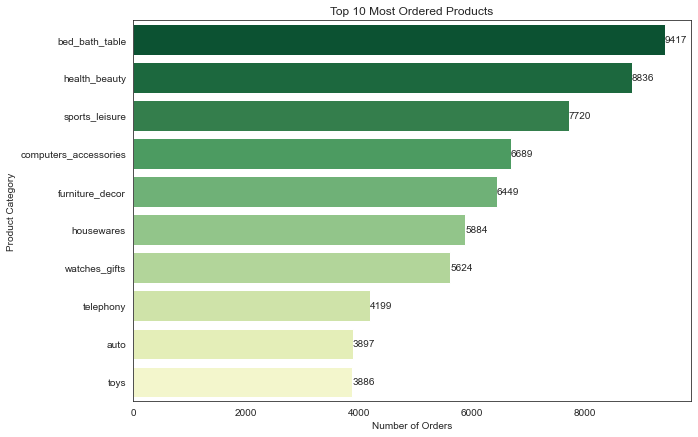

In [26]:
# Atur ukuran gambar
plt.figure(figsize=(10, 7))

# Atur style plot
sns.set_style("white")

# Buat barplot 10 kategori produk paling banyak dipesan
ax1 = sns.barplot(data=most_ordered[:10], x="order_count", 
                     y="product_category", palette="YlGn_r")

# Tampilkan label data
ax1.bar_label(ax1.containers[0])

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Top 10 Most Ordered Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product Category")

# Tampilkan plot
plt.show()

In [27]:
# Urutkan hasil grouping dari yang tersedikit dipesan dan reset index
least_ordered = ordered_products_count.sort_values("order_count").reset_index()

# Tampilkan data
least_ordered

,product_category,order_count
0,security_and_services,2
1,fashion_childrens_clothes,8
2,pc_gamer,8
3,cds_dvds_musicals,12
4,la_cuisine,13
...,...,...
66,furniture_decor,6449
67,computers_accessories,6689
68,sports_leisure,7720
69,health_beauty,8836


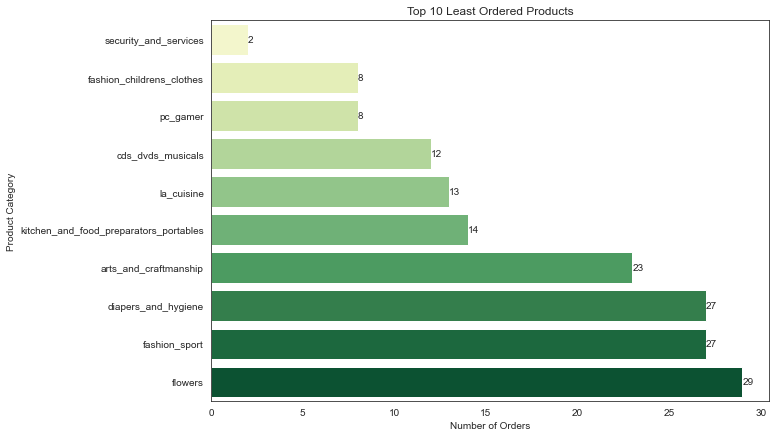

In [28]:
# Atur ukuran gambar
plt.figure(figsize=(10, 7))

# Atur style plot
sns.set_style("white")

# Buat barplot 10 kategori produk paling sedikit dipesan
ax1 = sns.barplot(data=least_ordered[:10], x="order_count", 
                       y="product_category", palette="YlGn")

# Tampilkan label data
ax1.bar_label(ax1.containers[0])

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Top 10 Least Ordered Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product Category")

# Tampilkan plot
plt.show()

## Objektif #2: Bagaimana potensi kehilangan pendapatan (revenue loss) tiap produk yang dipesan?

### Data Preparation

In [29]:
# Ubah nama kolom
product_category = ordered_products.rename({"order_count":"order_id"}, axis=1)

# Tampilkan tabel kategori produk tiap order_id
product_category

,order_id,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,computers_accessories


In [30]:
# Tampilkan tabel order_items
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [31]:
# Tampilkan tabel order
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [32]:
# Gabungkan tabel order dengan order_items
order_details = pd.merge(order_items, order, on="order_id", how="left")
order_details = pd.merge(order_details, product_category,on="order_id", how="left")

# Tampilkan tabel gabungan
order_details

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114462,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,housewares
114463,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,computers_accessories
114464,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,sports_leisure
114465,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,computers_accessories


In [33]:
# Filter kolom yang akan dianalisis
failed_order = order_details.loc[:,["order_id", "order_item_id","order_status",
                                    "product_id", "product_category", 
                                    "order_purchase_timestamp", "price", "freight_value",]]


# Filter data berdasarkan status order penyebab revenue loss
failed_order = failed_order.loc[(order_details["order_status"]=="canceled") | (order_details["order_status"]=="unavailable")]

# Reset index
failed_order = failed_order.reset_index(drop=True)

# Tampilkan data hasil filter
failed_order

,order_id,order_item_id,order_status,product_id,product_category,order_purchase_timestamp,price,freight_value
0,00310b0c75bb13015ec4d82d341865a4,1,canceled,c8e7c2ef329fcda4a233e7e2f8bb8b7d,housewares,2018-08-15 14:29:08,39.90,15.38
1,00ae7a8b4936674ebb701d4a23719a79,1,canceled,66f09a6de4f2ef63aaf5349b60a0e0c0,auto,2018-05-09 14:14:06,27.90,9.26
2,00ff0cf5583758e6964723e42f111bf4,1,canceled,bb1fe952bdc16ef8974d4ca11aec19b7,health_beauty,2017-04-10 00:45:56,154.90,15.25
3,013e9c654a339d80b53513da3c1ea437,1,canceled,bcac2cdcd851929a5caa3e1508d5abc9,housewares,2017-06-18 13:48:48,109.90,13.11
4,0148d3df00cebda592d4e5f966e300cc,1,canceled,ed08ea04c92f5f434c2362f7310fb328,housewares,2017-08-19 19:08:26,5.53,11.85
...,...,...,...,...,...,...,...,...
546,fb265b2dc558a56445dfc48f8224e201,1,canceled,baf25ed4f8f70238cc87230379471454,health_beauty,2017-10-10 20:21:14,9.90,121.22
547,fc3c882665c98c9b737a7b1b3aa6c553,1,canceled,44aadbb26d5c81d9846b0c48bc00d7a3,bed_bath_table,2018-04-17 18:41:50,28.90,8.88
548,fdbbb1715d0c62c714e2a8178b95dd54,1,canceled,1b43b0a6105ffaa6dae01356daec2657,health_beauty,2018-05-20 21:30:58,57.99,11.15
549,fe9aa3b22b4d65ccbaffb57984bc12fb,1,canceled,e71589252b1fc69c5a7931ee5028ecf6,toys,2017-11-14 19:30:10,39.90,7.78


### Finding and Handling Missing Values

In [34]:
# Cek dan hitung banyaknya missing value tiap kolom
failed_order.isna().sum()

order_id                     0
order_item_id                0
order_status                 0
product_id                   0
product_category            14
order_purchase_timestamp     0
price                        0
freight_value                0
dtype: int64

In [35]:
# Cek tipe data tiap kolom
failed_order.dtypes

order_id                     object
order_item_id                 int64
order_status                 object
product_id                   object
product_category             object
order_purchase_timestamp     object
price                       float64
freight_value               float64
dtype: object

In [36]:
# Cek selisih total missing values kolom "product_id" dan "product_category"\
# Adanya selisih berarti terdapat produk yang kategorinya tidak diketahui 
failed_order.loc[failed_order["product_id"].notna() & failed_order["product_category"].isna()]

,order_id,order_item_id,order_status,product_id,product_category,order_purchase_timestamp,price,freight_value
11,01e7cf79ff6fdb0a65634f714c67dd24,1,canceled,32a99bb84ae79a55c0e446afc9310e1e,NaN,2018-02-15 14:58:55,27.30,11.85
47,12e1495369c542f003eb3ca480f924e3,1,canceled,a08ffa6ecdd0ab3c1f4fe348acc2553b,NaN,2017-09-12 19:17:03,129.99,9.72
73,1cee73866d7513dbc499639d14020ce4,1,canceled,794de06c32a626a5692ff50e4985d36f,NaN,2017-07-24 12:52:27,49.90,11.85
75,1db2abc72703311e809fc353b3cc4b65,1,canceled,3f6f946481fd39f4eda986012f6e0447,NaN,2017-08-02 19:21:07,39.95,11.73
137,3af427dfb9464cd660ac27292bb5d30b,1,canceled,b52385de7f52a8dc46d4195e2f77f965,NaN,2018-01-30 13:28:14,59.90,15.17
205,5ad5a1ef522da1732ab963ea1fb6165b,1,canceled,f52a0f70e54976873a4a7402349c6105,NaN,2017-06-22 19:53:09,13.50,11.73
256,6ef587afa4703fd874edb7ade8efc7b0,1,canceled,7f776a76a6dce545729c997e60240ffa,NaN,2017-11-18 02:39:31,8.50,11.73
302,821c1b3c87d17a24efad81096bee5f09,1,canceled,9f6e8441548dd40516cdb98f1b29c3d5,NaN,2017-10-21 17:39:23,124.90,13.43
348,9b4a1422c8b4e65d9ab330d8d32deddf,1,canceled,44483ca1c9223756ee0ee71c0676d3a3,NaN,2017-07-09 18:18:03,76.90,13.56
369,a8b78b69f09b2a198f5a89c1897f8c72,1,canceled,e3c816666a7d2a1e7fbf02651e550b78,NaN,2018-02-17 17:16:24,20.99,11.85


In [37]:
# Isi missing value kategori produk yang memiliki product_id
failed_order["product_category"] = failed_order["product_category"].fillna("unknown")

# Tampilkan data setelah handling missing values
failed_order

,order_id,order_item_id,order_status,product_id,product_category,order_purchase_timestamp,price,freight_value
0,00310b0c75bb13015ec4d82d341865a4,1,canceled,c8e7c2ef329fcda4a233e7e2f8bb8b7d,housewares,2018-08-15 14:29:08,39.90,15.38
1,00ae7a8b4936674ebb701d4a23719a79,1,canceled,66f09a6de4f2ef63aaf5349b60a0e0c0,auto,2018-05-09 14:14:06,27.90,9.26
2,00ff0cf5583758e6964723e42f111bf4,1,canceled,bb1fe952bdc16ef8974d4ca11aec19b7,health_beauty,2017-04-10 00:45:56,154.90,15.25
3,013e9c654a339d80b53513da3c1ea437,1,canceled,bcac2cdcd851929a5caa3e1508d5abc9,housewares,2017-06-18 13:48:48,109.90,13.11
4,0148d3df00cebda592d4e5f966e300cc,1,canceled,ed08ea04c92f5f434c2362f7310fb328,housewares,2017-08-19 19:08:26,5.53,11.85
...,...,...,...,...,...,...,...,...
546,fb265b2dc558a56445dfc48f8224e201,1,canceled,baf25ed4f8f70238cc87230379471454,health_beauty,2017-10-10 20:21:14,9.90,121.22
547,fc3c882665c98c9b737a7b1b3aa6c553,1,canceled,44aadbb26d5c81d9846b0c48bc00d7a3,bed_bath_table,2018-04-17 18:41:50,28.90,8.88
548,fdbbb1715d0c62c714e2a8178b95dd54,1,canceled,1b43b0a6105ffaa6dae01356daec2657,health_beauty,2018-05-20 21:30:58,57.99,11.15
549,fe9aa3b22b4d65ccbaffb57984bc12fb,1,canceled,e71589252b1fc69c5a7931ee5028ecf6,toys,2017-11-14 19:30:10,39.90,7.78


In [38]:
# Cek dan hitung kembali banyaknya missing value tiap kolom
failed_order.isna().sum()

order_id                    0
order_item_id               0
order_status                0
product_id                  0
product_category            0
order_purchase_timestamp    0
price                       0
freight_value               0
dtype: int64

### Finding and Handling Duplicate

In [39]:
# Cek dan hitung banyaknya duplikat pada data
failed_order.duplicated().sum()

0

### Finding and Handling Inconsistent Format

In [40]:
# Cek informasi tabel
failed_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  551 non-null    object 
 1   order_item_id             551 non-null    int64  
 2   order_status              551 non-null    object 
 3   product_id                551 non-null    object 
 4   product_category          551 non-null    object 
 5   order_purchase_timestamp  551 non-null    object 
 6   price                     551 non-null    float64
 7   freight_value             551 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 34.6+ KB


In [41]:
# Cek data unik pada kolom kategori produk
failed_order_unique = failed_order["product_category"].unique()

# Urutkan dan tampilkan data unik
print(sorted(failed_order_unique))

# Tidak ditemukan data nama kategori produk yang formatnya tidak konsisten

['air_conditioning', 'art', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'christmas_supplies', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashion_bags_accessories', 'fashion_male_clothing', 'fashion_shoes', 'fixed_telephony', 'food', 'food_drink', 'furniture_decor', 'furniture_living_room', 'garden_tools', 'health_beauty', 'home_appliances', 'home_construction', 'housewares', 'kitchen_and_food_preparators_portables', 'kitchen_dining_laundry_garden_furniture', 'luggage_accessories', 'market_place', 'musical_instruments', 'office_furniture', 'pc_gamer', 'perfumery', 'pet_shop', 'small_appliances', 'sports_leisure', 'stationery', 'telephony', 'toys', 'unknown', 'watches_gifts']


In [42]:
# Casting tipe data kolom order_purchase_timestamp menjadi datetime
failed_order["order_purchase_timestamp"] = failed_order["order_purchase_timestamp"].astype("datetime64")

# Cek kembali informasi tabel setelah handling inconsistent format
failed_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  551 non-null    object        
 1   order_item_id             551 non-null    int64         
 2   order_status              551 non-null    object        
 3   product_id                551 non-null    object        
 4   product_category          551 non-null    object        
 5   order_purchase_timestamp  551 non-null    datetime64[ns]
 6   price                     551 non-null    float64       
 7   freight_value             551 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.6+ KB


### Summarize Data

In [43]:
# Tampilkan data
failed_order

,order_id,order_item_id,order_status,product_id,product_category,order_purchase_timestamp,price,freight_value
0,00310b0c75bb13015ec4d82d341865a4,1,canceled,c8e7c2ef329fcda4a233e7e2f8bb8b7d,housewares,2018-08-15 14:29:08,39.90,15.38
1,00ae7a8b4936674ebb701d4a23719a79,1,canceled,66f09a6de4f2ef63aaf5349b60a0e0c0,auto,2018-05-09 14:14:06,27.90,9.26
2,00ff0cf5583758e6964723e42f111bf4,1,canceled,bb1fe952bdc16ef8974d4ca11aec19b7,health_beauty,2017-04-10 00:45:56,154.90,15.25
3,013e9c654a339d80b53513da3c1ea437,1,canceled,bcac2cdcd851929a5caa3e1508d5abc9,housewares,2017-06-18 13:48:48,109.90,13.11
4,0148d3df00cebda592d4e5f966e300cc,1,canceled,ed08ea04c92f5f434c2362f7310fb328,housewares,2017-08-19 19:08:26,5.53,11.85
...,...,...,...,...,...,...,...,...
546,fb265b2dc558a56445dfc48f8224e201,1,canceled,baf25ed4f8f70238cc87230379471454,health_beauty,2017-10-10 20:21:14,9.90,121.22
547,fc3c882665c98c9b737a7b1b3aa6c553,1,canceled,44aadbb26d5c81d9846b0c48bc00d7a3,bed_bath_table,2018-04-17 18:41:50,28.90,8.88
548,fdbbb1715d0c62c714e2a8178b95dd54,1,canceled,1b43b0a6105ffaa6dae01356daec2657,health_beauty,2018-05-20 21:30:58,57.99,11.15
549,fe9aa3b22b4d65ccbaffb57984bc12fb,1,canceled,e71589252b1fc69c5a7931ee5028ecf6,toys,2017-11-14 19:30:10,39.90,7.78


In [44]:
# Hitung revenue tiap order
failed_order["revenue"] = failed_order["price"] + failed_order["freight_value"]

# Tampilkan data
failed_order

,order_id,order_item_id,order_status,product_id,product_category,order_purchase_timestamp,price,freight_value,revenue
0,00310b0c75bb13015ec4d82d341865a4,1,canceled,c8e7c2ef329fcda4a233e7e2f8bb8b7d,housewares,2018-08-15 14:29:08,39.90,15.38,55.28
1,00ae7a8b4936674ebb701d4a23719a79,1,canceled,66f09a6de4f2ef63aaf5349b60a0e0c0,auto,2018-05-09 14:14:06,27.90,9.26,37.16
2,00ff0cf5583758e6964723e42f111bf4,1,canceled,bb1fe952bdc16ef8974d4ca11aec19b7,health_beauty,2017-04-10 00:45:56,154.90,15.25,170.15
3,013e9c654a339d80b53513da3c1ea437,1,canceled,bcac2cdcd851929a5caa3e1508d5abc9,housewares,2017-06-18 13:48:48,109.90,13.11,123.01
4,0148d3df00cebda592d4e5f966e300cc,1,canceled,ed08ea04c92f5f434c2362f7310fb328,housewares,2017-08-19 19:08:26,5.53,11.85,17.38
...,...,...,...,...,...,...,...,...,...
546,fb265b2dc558a56445dfc48f8224e201,1,canceled,baf25ed4f8f70238cc87230379471454,health_beauty,2017-10-10 20:21:14,9.90,121.22,131.12
547,fc3c882665c98c9b737a7b1b3aa6c553,1,canceled,44aadbb26d5c81d9846b0c48bc00d7a3,bed_bath_table,2018-04-17 18:41:50,28.90,8.88,37.78
548,fdbbb1715d0c62c714e2a8178b95dd54,1,canceled,1b43b0a6105ffaa6dae01356daec2657,health_beauty,2018-05-20 21:30:58,57.99,11.15,69.14
549,fe9aa3b22b4d65ccbaffb57984bc12fb,1,canceled,e71589252b1fc69c5a7931ee5028ecf6,toys,2017-11-14 19:30:10,39.90,7.78,47.68


In [45]:
# Hitung jumlah revenue loss berdasarkan kategori produk
revenue_loss_category = failed_order[["product_category","revenue"]].groupby("product_category").sum()

# Reset index
revenue_loss_category = revenue_loss_category.reset_index()

# Urutkan hasil perhitungan
revenue_loss_category = revenue_loss_category.sort_values("revenue", ascending=False).reset_index(drop=True)

# Tampilkan data jumlah revenue loss berdasarkan order_statusnya
revenue_loss_category

,product_category,revenue
0,cool_stuff,15243.71
1,sports_leisure,9411.85
2,computers_accessories,8330.82
3,watches_gifts,7249.14
4,auto,6777.68
5,housewares,6362.63
6,garden_tools,4694.01
7,toys,4589.26
8,musical_instruments,4116.05
9,health_beauty,3642.67


### Visualization

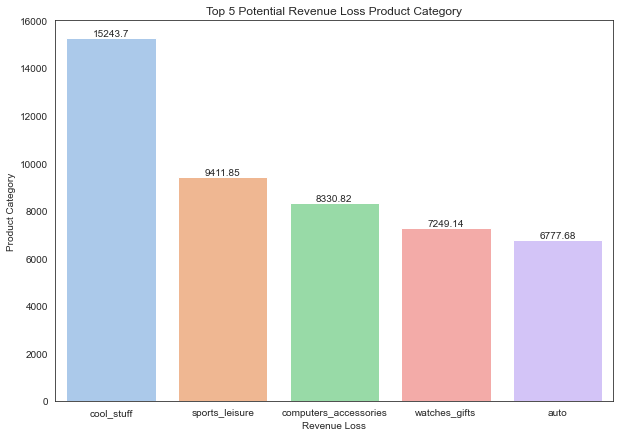

In [46]:
# Atur ukuran gambar
plt.figure(figsize=(10, 7))

# Atur style plot
sns.set_style("white")

# Buat barplot 10 kategori produk paling banyak dipesan
ax1 = sns.barplot(data=revenue_loss_category[:5], x="product_category", 
                     y="revenue", palette="pastel")

# Tampilkan label data
ax1.bar_label(ax1.containers[0])

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Top 5 Potential Revenue Loss Product Category")
plt.xlabel("Revenue Loss")
plt.ylabel("Product Category")

# Tampilkan plot
plt.show()

## Objektif #3: Bagaimana trend total pendapatan (revenue) tiap kategori produk selama satu tahun terakhir?

### Data Preparation

In [47]:
# Hitung revenue tiap order
order_details["revenue"] = order_details["price"] + order_details["freight_value"]

# Tampilkan tabel detail order
order_details.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,furniture_decor,216.87


In [48]:
# Filter kolom yang akan dianalisis
order_revenue = order_details.loc[:,["order_id","order_item_id",
                                     "order_status","order_purchase_timestamp", 
                                     "product_category", "revenue"]]

# Filter data berdasarkan status keberhasilan pengiriman
delivered_order = order_revenue.loc[(order_revenue["order_status"]=="delivered")]

# Reset index
delivered_order = delivered_order.reset_index(drop=True)

# Tampilkan data
delivered_order.head(3)

,order_id,order_item_id,order_status,order_purchase_timestamp,product_category,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,delivered,2017-09-13 08:59:02,cool_stuff,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,delivered,2017-04-26 10:53:06,pet_shop,259.83
2,000229ec398224ef6ca0657da4fc703e,1,delivered,2018-01-14 14:33:31,furniture_decor,216.87


### Finding and Handling Missing Values

In [49]:
# Cek dan hitung banyaknya missing value tiap kolom
delivered_order.isna().sum()

order_id                       0
order_item_id                  0
order_status                   0
order_purchase_timestamp       0
product_category            1467
revenue                        0
dtype: int64

In [50]:
# Isi missing value kategori produk yang tidak memiliki product_id
delivered_order["product_category"] = delivered_order["product_category"].fillna("unknown")

# Tampilkan data setelah handling missing values
delivered_order.head(3)

,order_id,order_item_id,order_status,order_purchase_timestamp,product_category,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,delivered,2017-09-13 08:59:02,cool_stuff,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,delivered,2017-04-26 10:53:06,pet_shop,259.83
2,000229ec398224ef6ca0657da4fc703e,1,delivered,2018-01-14 14:33:31,furniture_decor,216.87


In [51]:
# Cek dan hitung kembali banyaknya missing value tiap kolom
delivered_order.isna().sum()

order_id                    0
order_item_id               0
order_status                0
order_purchase_timestamp    0
product_category            0
revenue                     0
dtype: int64

### Finding and Handling Duplicate

In [52]:
# Cek dan hitung banyaknya duplikat pada data
delivered_order.duplicated().sum()

0

### Finding and Handling Inconsistent Format

In [53]:
# Tampilkan informasi dari data
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112006 entries, 0 to 112005
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112006 non-null  object 
 1   order_item_id             112006 non-null  int64  
 2   order_status              112006 non-null  object 
 3   order_purchase_timestamp  112006 non-null  object 
 4   product_category          112006 non-null  object 
 5   revenue                   112006 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [54]:
# Casting tipe data kolom order_purchase_timestamp menjadi datetime
delivered_order["order_purchase_timestamp"] = delivered_order["order_purchase_timestamp"].astype("datetime64")

# Tampilkan informasi dari data
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112006 entries, 0 to 112005
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112006 non-null  object        
 1   order_item_id             112006 non-null  int64         
 2   order_status              112006 non-null  object        
 3   order_purchase_timestamp  112006 non-null  datetime64[ns]
 4   product_category          112006 non-null  object        
 5   revenue                   112006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 5.1+ MB


### Summarize Data

In [55]:
# Ekstrak informasi tahun, bulan, dan tanggal
delivered_order["month_year"] = delivered_order["order_purchase_timestamp"].dt.to_period('M')

# Tampilkan data terbaru
delivered_order.head(3)

,order_id,order_item_id,order_status,order_purchase_timestamp,product_category,revenue,month_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,delivered,2017-09-13 08:59:02,cool_stuff,72.19,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,delivered,2017-04-26 10:53:06,pet_shop,259.83,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,delivered,2018-01-14 14:33:31,furniture_decor,216.87,2018-01


In [56]:
# Casting tipe data kolom order_purchase_timestamp menjadi datetime
delivered_order["month_year"] = delivered_order["month_year"].astype("string")

# Tampilkan informasi
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112006 entries, 0 to 112005
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112006 non-null  object        
 1   order_item_id             112006 non-null  int64         
 2   order_status              112006 non-null  object        
 3   order_purchase_timestamp  112006 non-null  datetime64[ns]
 4   product_category          112006 non-null  object        
 5   revenue                   112006 non-null  float64       
 6   month_year                112006 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(1)
memory usage: 6.0+ MB


In [57]:
# Hitung revenue tiap kategori produk
total_revenue_product = delivered_order[["product_category","revenue"]].groupby("product_category").sum()

# Urutkan hasil grouping dan reset index
most_revenue = total_revenue_product.sort_values("revenue", ascending=False).reset_index()

# Ambil lima data category product penghasil revenue terbanyak
top5_revenue = most_revenue.head()

# Tampilkan data total revenue tiap kategori produk
top5_revenue

,product_category,revenue
0,health_beauty,1419560.98
1,watches_gifts,1269589.35
2,bed_bath_table,1248777.36
3,sports_leisure,1127560.34
4,computers_accessories,1039369.46


In [58]:
# Definisikan kondisi untuk filter data
kondisi1 = delivered_order["product_category"]=="health_beauty"
kondisi2 = delivered_order["product_category"]=="watches_gifts"
kondisi3 = delivered_order["product_category"]=="bed_bath_table"
kondisi4 = delivered_order["product_category"]=="sports_leisure"
kondisi5 = delivered_order["product_category"]=="computers_accessories"

# Filter data berdasarkan 5 kategori produk penghasil revenue terbanyak dan riset index
top_revenue_product = delivered_order.loc[kondisi1|kondisi2|kondisi3|kondisi4|kondisi5]\
                      .reset_index(drop=True)

# Tampilkan data hasil filter
top_revenue_product.head(3)

,order_id,order_item_id,order_status,order_purchase_timestamp,product_category,revenue,month_year
0,0005a1a1728c9d785b8e2b08b904576c,1,delivered,2018-03-19 18:40:33,health_beauty,157.60,2018-03
1,00061f2a7bc09da83e415a52dc8a4af1,1,delivered,2018-03-24 22:16:10,health_beauty,68.87,2018-03
2,0006ec9db01a64e59a68b2c340bf65a7,1,delivered,2018-07-24 17:04:17,bed_bath_table,97.32,2018-07


In [59]:
# Cek nilai Min dan Max data Datetime pada dataframe
min(top_revenue_product.order_purchase_timestamp), max(top_revenue_product.order_purchase_timestamp)

(Timestamp('2016-09-15 12:16:38'), Timestamp('2018-08-29 15:00:37'))

In [60]:
# Definisikan kondisi untuk filter data berdasarkan waktu\
# setahun terakhir dan bulan telah berlalu secara penuh
waktu1 = top_revenue_product["order_purchase_timestamp"] <= "2018-07-31"
waktu2 = top_revenue_product["order_purchase_timestamp"] >= "2017-08-01"

# Filter data berdasarkan waktu setahun
top_revenue_product = top_revenue_product.loc[waktu1 & waktu2].reset_index(drop=True)

# Tampilkan data hasil filter
top_revenue_product.head(3)

,order_id,order_item_id,order_status,order_purchase_timestamp,product_category,revenue,month_year
0,0005a1a1728c9d785b8e2b08b904576c,1,delivered,2018-03-19 18:40:33,health_beauty,157.60,2018-03
1,00061f2a7bc09da83e415a52dc8a4af1,1,delivered,2018-03-24 22:16:10,health_beauty,68.87,2018-03
2,0006ec9db01a64e59a68b2c340bf65a7,1,delivered,2018-07-24 17:04:17,bed_bath_table,97.32,2018-07


In [61]:
# Cek nilai Min dan Max Datetime pada dataframe
min(top_revenue_product.order_purchase_timestamp), max(top_revenue_product.order_purchase_timestamp)

(Timestamp('2017-08-01 00:02:01'), Timestamp('2018-07-30 23:51:39'))

In [62]:
# Tampilkan data
top_revenue_product.head(3)

,order_id,order_item_id,order_status,order_purchase_timestamp,product_category,revenue,month_year
0,0005a1a1728c9d785b8e2b08b904576c,1,delivered,2018-03-19 18:40:33,health_beauty,157.60,2018-03
1,00061f2a7bc09da83e415a52dc8a4af1,1,delivered,2018-03-24 22:16:10,health_beauty,68.87,2018-03
2,0006ec9db01a64e59a68b2c340bf65a7,1,delivered,2018-07-24 17:04:17,bed_bath_table,97.32,2018-07


In [63]:
# Ringkas data menjadi bentuk pivot
monthly_revenue = top_revenue_product.pivot_table(values="revenue", index=["month_year"],
                                                  columns=["product_category"], aggfunc="sum")

# Tampilkan pivot data
monthly_revenue

product_category,bed_bath_table,computers_accessories,health_beauty,sports_leisure,watches_gifts
month_year,,,,,
2017-08,66769.12,39770.03,55454.46,48788.14,39608.94
2017-09,63198.20,33240.99,58236.94,57640.46,49402.94
2017-10,56753.25,49279.88,47592.38,56899.41,69814.38
2017-11,107259.48,80442.73,88704.62,73821.73,103631.87
2017-12,60916.74,43127.73,69297.48,68496.78,74942.59
2018-01,91058.63,93588.68,82301.85,100599.26,79482.28
2018-02,71796.11,117547.96,95596.82,86448.34,66599.36
2018-03,83381.67,99604.07,97165.34,96458.21,104754.31
2018-04,86630.89,67560.03,105439.00,77486.85,97286.17


### Visualization

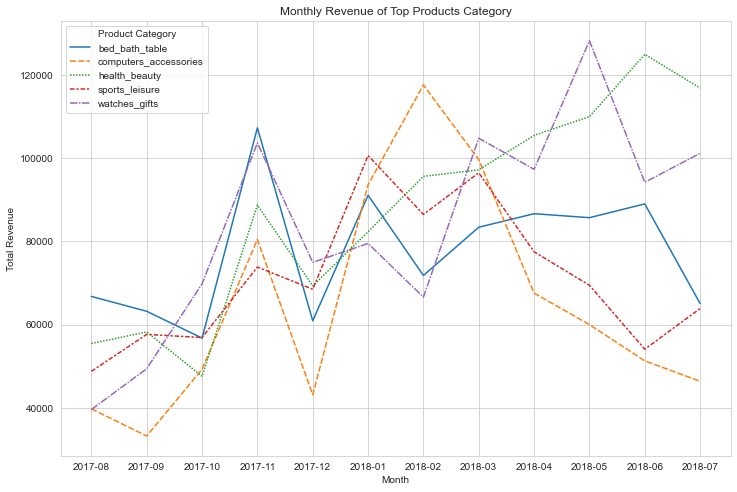

In [64]:
# Atur ukuran gambar
plt.figure(figsize=(12, 8))

# Atur style plot
sns.set_style("whitegrid")

# Buat barplot 10 kategori produk paling banyak dipesan
ax1 = sns.lineplot(data=monthly_revenue)

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Monthly Revenue of Top Products Category")
plt.xlabel("Month")
plt.ylabel("Total Revenue")

# Tambahkan nama legend
plt.legend(title="Product Category")

# Tampilkan plot
plt.show()

## Objektif #4: Bagaimana trend jumlah produk yang berhasil dikirim ke customer selama setahun terakhir?

### Data Preparation

In [65]:
# Tampilkan data detail order berstatus "delivered"
delivered_order.head(3)

,order_id,order_item_id,order_status,order_purchase_timestamp,product_category,revenue,month_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,delivered,2017-09-13 08:59:02,cool_stuff,72.19,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,delivered,2017-04-26 10:53:06,pet_shop,259.83,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,delivered,2018-01-14 14:33:31,furniture_decor,216.87,2018-01


In [66]:
# Tampilkan informasi data
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112006 entries, 0 to 112005
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112006 non-null  object        
 1   order_item_id             112006 non-null  int64         
 2   order_status              112006 non-null  object        
 3   order_purchase_timestamp  112006 non-null  datetime64[ns]
 4   product_category          112006 non-null  object        
 5   revenue                   112006 non-null  float64       
 6   month_year                112006 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(1)
memory usage: 6.0+ MB


In [67]:
# Cek nilai Min dan Max Datetime pada dataframe
min(delivered_order.order_purchase_timestamp), max(delivered_order.order_purchase_timestamp)

(Timestamp('2016-09-15 12:16:38'), Timestamp('2018-08-29 15:00:37'))

### Summarize Data

In [68]:
# Definisikan kondisi untuk filter data berdasarkan waktu\
# setahun terakhir dan bulan telah berlalu secara penuh
waktu1 = delivered_order["order_purchase_timestamp"] <= "2018-07-31"
waktu2 = delivered_order["order_purchase_timestamp"] >= "2017-08-01"

# Filter data berdasarkan waktu setahun
delivered_past_year = delivered_order.loc[waktu1 & waktu2].reset_index(drop=True)

# Ubah nama kolom 
delivered_past_year = delivered_past_year.rename({"order_id":"product_count"}, axis=1)

# Tampilkan data hasil filter
delivered_past_year

,product_count,order_item_id,order_status,order_purchase_timestamp,product_category,revenue,month_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,delivered,2017-09-13 08:59:02,cool_stuff,72.19,2017-09
1,000229ec398224ef6ca0657da4fc703e,1,delivered,2018-01-14 14:33:31,furniture_decor,216.87,2018-01
2,00054e8431b9d7675808bcb819fb4a32,1,delivered,2017-12-10 11:53:48,telephony,31.75,2017-12
3,000576fe39319847cbb9d288c5617fa6,1,delivered,2018-07-04 12:08:27,garden_tools,880.75,2018-07
4,0005a1a1728c9d785b8e2b08b904576c,1,delivered,2018-03-19 18:40:33,health_beauty,157.60,2018-03
...,...,...,...,...,...,...,...
83572,fffc94f6ce00a00581880bf54a75a037,1,delivered,2018-04-23 13:57:06,housewares,343.40,2018-04
83573,fffcd46ef2263f404302a634eb57f7eb,1,delivered,2018-07-14 10:26:46,computers_accessories,386.53,2018-07
83574,fffce4705a9662cd70adb13d4a31832d,1,delivered,2017-10-23 17:07:56,sports_leisure,116.85,2017-10
83575,fffe18544ffabc95dfada21779c9644f,1,delivered,2017-08-14 23:02:59,computers_accessories,64.71,2017-08


In [69]:
# Cek nilai Min dan Max Datetime pada dataframe
min(delivered_past_year.order_purchase_timestamp), max(delivered_past_year.order_purchase_timestamp)

(Timestamp('2017-08-01 00:02:01'), Timestamp('2018-07-30 23:54:48'))

In [70]:
# Hitung banyaknya produk yang berhasil dikirim tiap bulan
delivered_products = delivered_past_year[["month_year","product_count"]].groupby("month_year").count().reset_index()

# Tampilkan data banyaknya delivered order selama setahun terakhir
delivered_products

,month_year,product_count
0,2017-08,4901
1,2017-09,4804
2,2017-10,5282
3,2017-11,8612
4,2017-12,6276
5,2018-01,8144
6,2018-02,7569
7,2018-03,8151
8,2018-04,7989
9,2018-05,7975


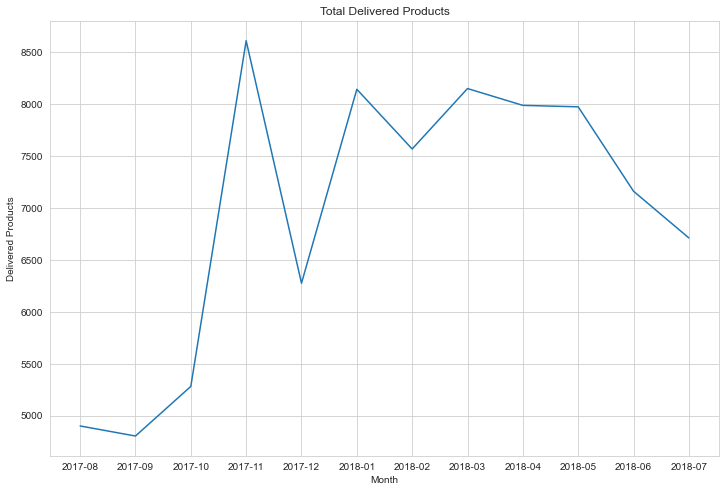

In [71]:
# Atur ukuran gambar
plt.figure(figsize=(12, 8))

# Atur style plot
sns.set_style("whitegrid")

# Buat barplot 10 kategori produk paling banyak dipesan
ax1 = sns.lineplot(x="month_year", y="product_count", data=delivered_products)

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Total Delivered Products")
plt.xlabel("Month")
plt.ylabel("Delivered Products")

# Tampilkan plot
plt.show()

## Objektif #5: Bagaimana trend total pendapatan (revenue) perusahaan selama setahun terakhir?

### Data Preparation

In [72]:
# Tampilkan data detail order berstatus "delivered"
delivered_past_year

,product_count,order_item_id,order_status,order_purchase_timestamp,product_category,revenue,month_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,delivered,2017-09-13 08:59:02,cool_stuff,72.19,2017-09
1,000229ec398224ef6ca0657da4fc703e,1,delivered,2018-01-14 14:33:31,furniture_decor,216.87,2018-01
2,00054e8431b9d7675808bcb819fb4a32,1,delivered,2017-12-10 11:53:48,telephony,31.75,2017-12
3,000576fe39319847cbb9d288c5617fa6,1,delivered,2018-07-04 12:08:27,garden_tools,880.75,2018-07
4,0005a1a1728c9d785b8e2b08b904576c,1,delivered,2018-03-19 18:40:33,health_beauty,157.60,2018-03
...,...,...,...,...,...,...,...
83572,fffc94f6ce00a00581880bf54a75a037,1,delivered,2018-04-23 13:57:06,housewares,343.40,2018-04
83573,fffcd46ef2263f404302a634eb57f7eb,1,delivered,2018-07-14 10:26:46,computers_accessories,386.53,2018-07
83574,fffce4705a9662cd70adb13d4a31832d,1,delivered,2017-10-23 17:07:56,sports_leisure,116.85,2017-10
83575,fffe18544ffabc95dfada21779c9644f,1,delivered,2017-08-14 23:02:59,computers_accessories,64.71,2017-08


In [73]:
# Tampilkan informasi data
delivered_past_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83577 entries, 0 to 83576
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   product_count             83577 non-null  object        
 1   order_item_id             83577 non-null  int64         
 2   order_status              83577 non-null  object        
 3   order_purchase_timestamp  83577 non-null  datetime64[ns]
 4   product_category          83577 non-null  object        
 5   revenue                   83577 non-null  float64       
 6   month_year                83577 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(1)
memory usage: 4.5+ MB


In [74]:
# Cek nilai Min dan Max Datetime pada dataframe
min(delivered_past_year.order_purchase_timestamp), max(delivered_past_year.order_purchase_timestamp)

(Timestamp('2017-08-01 00:02:01'), Timestamp('2018-07-30 23:54:48'))

### Summarize Data

In [75]:
# Ubah nama kolom 
delivered_past_year = delivered_past_year.rename({"product_count":"order_id"}, axis=1)

# Hitung banyaknya produk yang berhasil dikirim tiap bulan
delivered_revenue = delivered_past_year[["month_year","revenue"]].groupby("month_year").sum().reset_index()

# Tampilkan data banyaknya delivered order selama setahun terakhir
delivered_revenue

,month_year,revenue
0,2017-08,656229.09
1,2017-09,708723.92
2,2017-10,758209.32
3,2017-11,1167883.69
4,2017-12,852535.67
5,2018-01,1089378.80
6,2018-02,973234.69
7,2018-03,1134039.24
8,2018-04,1150987.15
9,2018-05,1146263.95


### Visualization

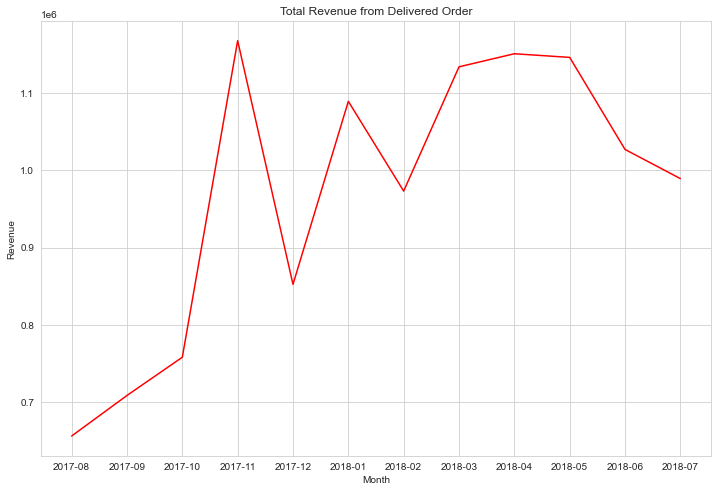

In [76]:
# Atur ukuran gambar
plt.figure(figsize=(12, 8))

# Atur style plot
sns.set_style("whitegrid")

# Buat barplot 10 kategori produk paling banyak dipesan
ax1 = sns.lineplot(x="month_year", y="revenue", 
                   data=delivered_revenue, color='Red')

# Tambahkan judul, label x-axis, dan label y-axis
plt.title("Total Revenue from Delivered Order")
plt.xlabel("Month")
plt.ylabel("Revenue")

# Tampilkan plot
plt.show()

### Visualization

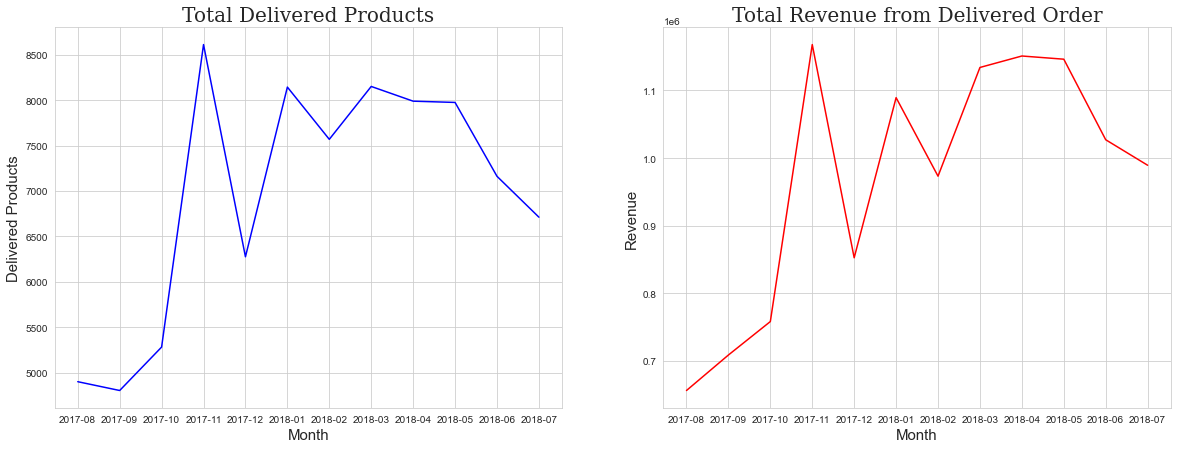

In [77]:
# Buat subplots
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

# Membuat lineplot
sns.lineplot(x="month_year", y="product_count", 
            data=delivered_products, color="Blue",
            ax = ax[0])

# Melakukan styling pada subplot pertama (axes 0)
## Menambahkan judul plot
ax[0].set_title("Total Delivered Products", fontsize = 20, fontfamily = 'serif')
## Mengubah label y
ax[0].set_ylabel("Delivered Products", fontsize = 15)
## Mengubah label x
ax[0].set_xlabel("Month", fontsize = 15)

# Membuat lineplot
sns.lineplot(x="month_year", y="revenue", 
             data=delivered_revenue, color="Red",
             ax = ax[1])

# Melakukan styling pada subplot kedua (axes 1)
## Menambahkan judul plot
ax[1].set_title("Total Revenue from Delivered Order", fontsize = 20, fontfamily = 'serif')
## Mengubah label y
ax[1].set_ylabel("Revenue", fontsize = 15)
## Mengubah label x
ax[1].set_xlabel("Month", fontsize = 15)

# Tampilkan hasil
plt.show()
